Note:
- python 3.6.4
- pandas 0.22.0
- matplotlib 3.1.3
- seaborn 0.8.1

In [29]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%pprint

Pretty printing has been turned OFF


## Pandas
### 整体绘图说明
- Series和Pandas都可以用
- 此功能是简化版的Matplotlib

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

- 基本使用说明
    - 任务背景：
        - 数据：
            1. 数据主体：使用`np.random.randn(10,4)`构造维度为10*4的随机数矩阵
            2. 数据index：使用`pd.date_range(起始日期, 间隔)`将index指定为日期型
            3. 数据字段columns：使用`list()`将括号中内容打散成单个list中的元素
            4.`pd.DataFrame({key:value})`是一列列按照key插入数据
    - 画图说明：
        - 一般使用pandas画图，都是一个字段为一条数据（所以，<u>有几个字段</u>，图上有几条线；<u>有多少行</u>，每条线上就有多少个数据点）
        - 标注说明
            - index会体现在X轴
            - 数据数值会体现在Y轴
            - 字段名会作为每条线的区分框
        - 常见画图种类（默认为折线图）`plot(kind='?')`
            - `bar`：纵向条形图，`barh`：横向条形图
            - `hist`：直方图
            - `boxplot`：盒型图
            - `area`：“面积”
            - `scatter`：散点图
            
- 情况举例
    - 四只股票在相同一段时间内的走势

#### 数据准备

In [29]:
# 产生columns名
list('ABCDEFHGIJ11')
# 产生数据
df = pd.DataFrame(np.random.randn(10,4))
df
# 添加index
df = pd.DataFrame(np.random.randn(10,4), index=pd.date_range('2019/04/15', periods=10))
df
# 添加columns
df = pd.DataFrame(np.random.randn(10,4), columns=list('ABCD'))
df

['A', 'B', 'C', 'D', 'E', 'F', 'H', 'G', 'I', 'J', '1', '1']

,0,1,2,3
0,-0.248255,-0.854918,1.253835,-0.845004
1,0.222434,0.113820,-1.474649,0.611882
2,-0.964863,0.900084,0.167273,-1.180423
3,-1.004401,-0.399733,-1.529642,-1.045334
4,0.548716,0.489768,-0.098176,1.281598
5,-1.559328,0.682875,-0.099628,0.977670
6,1.082588,-0.141498,-0.676432,-0.425957
7,1.738868,-1.199459,-1.231422,-1.700774
8,0.445750,2.549562,1.219352,-0.265597
9,0.637558,-0.647989,-0.286408,0.608787


,0,1,2,3
2019-04-15,-1.676586,1.062715,-0.084678,-1.546525
2019-04-16,-0.275726,-0.631138,0.500224,-0.291668
2019-04-17,-0.152135,1.795984,0.381754,0.301760
2019-04-18,0.605318,0.479920,-0.433979,1.510375
2019-04-19,0.773155,-0.184602,0.075272,-0.159687
2019-04-20,-1.600850,1.190064,-0.592735,-0.048943
2019-04-21,-1.448910,-0.269013,-0.109712,0.206292
2019-04-22,0.724157,-0.438936,-0.044283,-3.034503
2019-04-23,0.199354,0.630657,0.126437,1.268508
2019-04-24,-0.130583,-2.319425,0.738221,-0.738241


,A,B,C,D
0,0.731377,-0.568483,-0.737208,-0.864224
1,-0.268460,-1.253647,0.894234,-0.332702
2,-1.770792,-1.331510,0.568724,-0.089836
3,0.670527,-0.226777,-0.193308,-0.078986
4,-1.886221,-0.239840,0.921016,-1.434799
5,2.190386,-0.198673,0.005360,-2.054296
6,-2.627258,1.098564,-0.633123,-1.460843
7,-0.257756,-0.474662,-0.930906,-0.532086
8,-0.267780,0.391851,1.812280,0.621059
9,0.036684,0.695583,0.693859,1.840355


### 折线图--趋势
#### 一般折线图
- 如果画图有一列的是年龄，一列是收入，很可能出现年龄在图上体现不出来的情况。（在绘制之前，需要查看一下各个列的幅度关系）

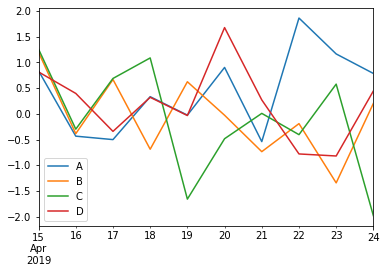

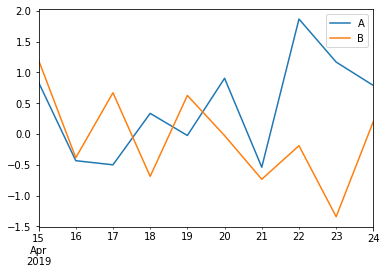

In [113]:
# 结合起来画图
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('2019/04/15',
   periods=10), columns=list('ABCD'))
df.plot()
df.loc[:,['A','B']].plot()

#### 堆积折线图--区域块图（连续）
- 创建方法：`Series.plot.area()`或`DataFrame.plot.area()`
- 意义：在某一节点上，在上一个字段数据基础上叠加当前字段数值（是一个幅度的累加值）

In [96]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

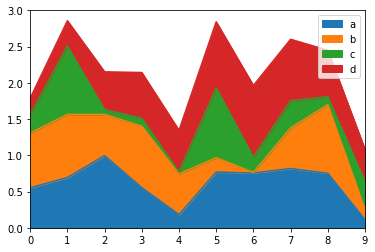

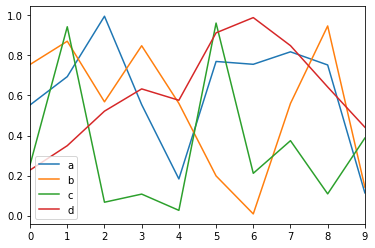

In [97]:
df.plot.area()
df.plot()

### 条形图（柱状图）--组间对比
对数据要求：
- 每一条样本x对应四个取值y（a,b,c,d）
- 有columns为标注

用法举例：
- 同一天，四支股票的量的情况

#### 一般条形图

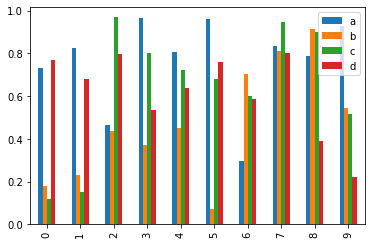

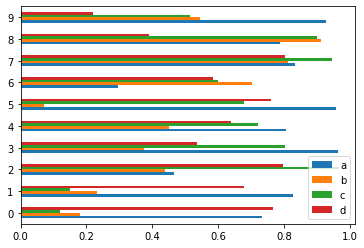

In [103]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.bar()
# df.plot(kind='bar')

df.plot.barh()
# df.plot(kind='barh')

#### 堆积条形图（离散）
- 指定：`pass stacked=True`
- 用法：以堆叠体现占比情况

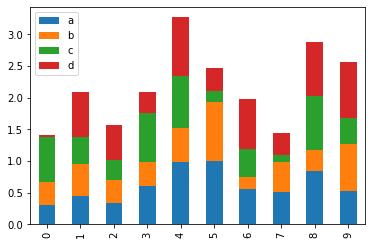

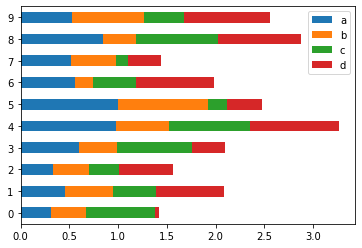

In [44]:
import pandas as pd
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
# 纵向堆积条形图
df.plot.bar(stacked=True)

# 横向堆积条形图
df.plot.barh(stacked=True)

### 单变量分布探究
#### 直方图

使用方法：
- 使用`plot.hist()`方法绘制直方图
- 使用`bins`指定一共使用的直方条数。

对数据要求：
- 有数据：为x轴
- 有columns：为标注名
- y轴为频率统计，不用指定

使用情况：
- 了解单维度变量的分布情况（拼多多和京东用户“年龄”分布的差异：将年龄这个维度切分成了很多段，看更集中的分布在哪个年龄段？）

##### 合并直方图

数据说明：
- `np.random.randn(1000).mean()`，随机生成1000个呈正态分布的数值点，均值对称轴μ=0
- `(np.random.randn(1000).mean()+1).mean()`，随机生成的1000个数值点，均值对称轴μ=1
- `(np.random.randn(1000).mean()-1).mean()`，随机生成的1000个数值点，均值对称轴μ=-1

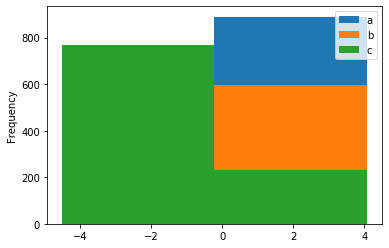

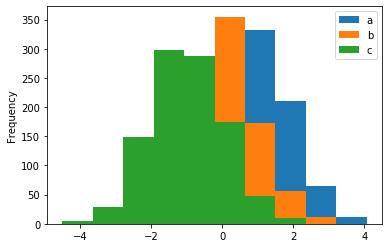

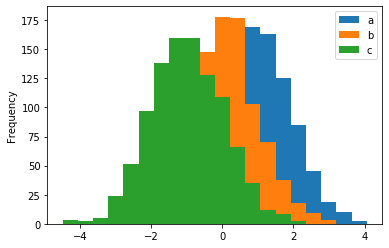

In [77]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1})
# df
# 当直方图刻画不出来的时候，一定是图上bins用少了
df.plot.hist(bins=2)

# 默认bins为10
df.plot.hist()
# df.plot(kind='hist')

# bins用的越多，刻画的就越细致
df.plot.hist(bins=20)

##### 独立直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce4be80>,
      dtype=object)

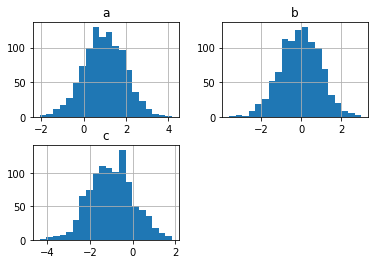

In [83]:
import pandas as pd
import numpy as np

df=pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1})

df.hist(bins=20)

#### 箱线图
Series和DataFrame的绘制方法：
- `Series.box.plot()`和`DataFrame.box.plot()` 不带网格线
- `DataFrame.boxplot()` 带网格线

对数据要求：
- 数据为连续值
- 有columns字段名

箱型图意义：
- 清洗脏数据：关注异常点、噪声点，找出不合理的数据（数据预处理做好了，后续套用算法会表现更厉害）
- 找出每个数据在统计意义上的位置，用于多组数据的比较

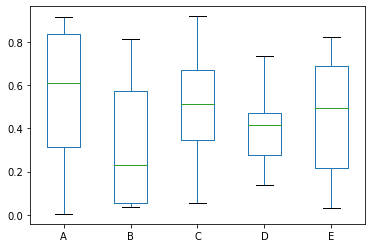

In [93]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
# df.boxplot()

- 箱子讲解：
    - **<u>绿线</u>**：中位数所处位置
    - **<u>上下箱底</u>**：25%和75%分位数（100个人从小打大排列，找出第25位置和第75位置人的身高）
    - **<u>箱体高度</u>**：（75分位数-25分位数），即**四分位距IQR**，反映了数据的波动程度
    - **<u>上下边界</u>**：
        - 上边界：在75%分位数位置向上叠加1.5*IQR，1.0为上界
        - 下边界：在25%分位数位置向下叠加1.5*IQR，0.0为下界
    - **<u>偏态</u>**：
        - **<u>正态分布</u>**：对称分布
        <img src='./img/gaussion.png' width='200px' height='200px'>
            - “均值 = 众数”
            - 中位线Q2在箱两端Q1和Q3中间
            - 上下端线(相邻值)到箱子的距离等长
            - 离群点在上下限值外的分布大致相同
        - 有偏分布：非对称分布
            - **<u>负(左)偏态</u>**：
            <img src='./img/left.png' width='200px' height='200px'>
                - “均值 < 众数(峰值)”
                - 中位线Q2靠近上四分位数线Q3
                - 下端线 > 上端线
                - 异常值集中在Q1侧
            - **<u>正(右)偏态</u>**：
            <img src='./img/right.png' width='200px' height='200px'>
                - “众数(峰值) < 均值”
                - 中位线Q2靠近下四分位数线Q1
                - 上端线 > 下端线
                - 异常值集中在Q3侧

                
- 使用指标：
    - **<u>异常值</u>**：
        - 上下边界以外的点
    - **<u>数据波动与集中程度</u>**：
        - 箱体越扁，端线越短，则数据越集中
        - 箱体越长，端线越长，则数据越波动
        
- **<u>极端情况原因</u>**（箱子扁、只有一条端线、存在很多异常值、箱体某一部分被隐藏）：
    - 样本中有特别大/特别小的离群值，箱子以整体被压缩的状态来体现异常（可以借此踢出异常值之后重新画图 ，看是否恢复正常了）。【泰坦尼克号船票：将数据做log】
    - 数据样本特别少，整个箱体受单个数据的影响被放大。
    
- 答疑：
    - 为什么有的箱线图上下1.5IQR线是不对称的？
        - 答：因为IQR是25%-75%上，1.5IQR加在上下边界之后可能会超过整体的数据范围，所以如果最小的数在`Q1-1.5IQR`之内，就不会有异常值，而且下端线也会相应缩短。【总之，上下端线不能超过整个取值的最小/大值，会对±1.5IQR范围内的最值做截断】
    - 如何找出异常值？
        - 用quantile求出25%和75%分位数，相减得到IQR，用df.loc筛选出大于`75%+1.5IQR`和`小于25%-1.5IQR`的数
    - 处理异常值时与3$\sigma$标准的异同
        - 统计边界是否受异常值影响、容忍度的大小

In [122]:
# 求分位数
df.loc[:,['A','B']].quantile([0.25,0.75])

,A,B
0.25,-0.332246,-0.613445
0.75,0.887073,0.519475


#### 直方图 VS 箱线图
- 直方图：
    - 适用于单组数据，更加直观
- 箱线图
    - 适用于多组数据，较直方图更加节省空间，能展示更多信息

### 散点图--两变量相关性
- 创建方法：`DataFrame.plot.scatter()`
- 用法：探究两个变量的分布相关程度（正/负相关）（可以展示两个维度x和y）

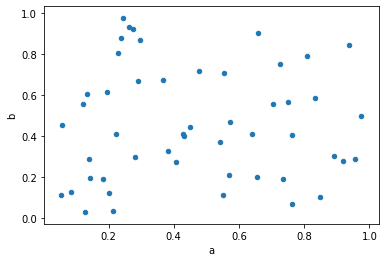

In [98]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

### 饼状图--百分比
- 创建方法：`DataFrame.plot.pie()`
- 说明：看离散数据分布，类似value_counts（e.g.衣服颜色不同占比有多高？）
- 注意：画图时，如果数据没有指定y轴信息，就要使用子图模式

,x
a,1.939838
b,1.679663
c,1.684563
d,0.504993


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12eb9fc88>],
      dtype=object)

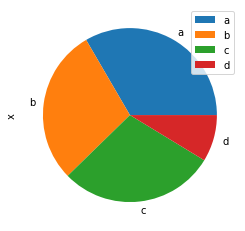

In [101]:
import pandas as pd
import numpy as np

df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df
df.plot.pie(subplots=True)

## Matplotlib
**point:**  
- 这个图的呈现有什么样的作用？
- 它在什么时候需要用它？
- 哪些场景下、哪些问题在我们遇到的时候，我们用什么样的方式去解决？

### 可视化图形的基本结构
* 重点掌握：知道有哪些东西是可配的
* 数据图基本结构：
    - 自己了解数据情况
        1. Data: 数据区，包括数据点、描绘形状（最重要，能看到数据的分布状况）
        2. Axis: 坐标轴，包括 X 轴、 Y 轴及其标签、刻度尺（每一格子代表的长度）及其标签
    - 汇报（以上两点加下面），让大家了解场景
        3. Title: 标题，数据图的描述
        4. Legend: 图例，区分图中包含的多种曲线或不同分类的数据
        5. 图形文本 (Text)、注解 (Annotate)等其他描述

![](./img/Python_Figure_Structure.png)

### 参考绘图方法
- 准备数据：使用numpy进行数组存储
* 绘制原始曲线
* 配置标题、坐标轴、刻度、图例
* 添加文字说明、注解
* 显示、保存绘图结果

下面是一个包含cos、sin、sqrt函数的完整图像：
![](./img/img.png)

#### 导包

会用到 matplotlib.pyplot、pylab 和 numpy，pandas(如果进行数据分析)

In [3]:
#coding:utf-8
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#### 准备数据

numpy 常用来组织源数据:

In [4]:
# 定义数据部分
x = np.arange(0., 10, 0.2)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.sqrt(x)

# 以下是实际工作中，可能会从df中抽取出的两列
#x = all_df['house_age']
#y = all_df['house_price']

#### 绘制基本曲线

- 使用 plot 函数直接绘制上述函数曲线
- 可以通过配置 plot 函数参数调整曲线的**样式、粗细、颜色、标记**等：

##### 颜色参数表
主要是color参数：
* r 红色
* g 绿色
* b 蓝色
* c cyan
* m 紫色
* y 土黄色
* k 黑色
* w 白色

![](./img/color.png)


##### linestyle 参数
linestyle 参数主要包含<u>虚线、点化虚线、粗虚线、实线</u>，如下：
- 常用样式参数：  

|符号|样式|符号|样式|
|:-:|:-:|:-:|:-:|
|'-', 'solid'|solid line|'--', 'dashed'|dashed line|
|'-.', 'dashdot'|dash-dot line|':'|dotted line|
|'None'|None|''|None|

![](./img/line_style.png)


##### marker参数

![](./img/marks.png)


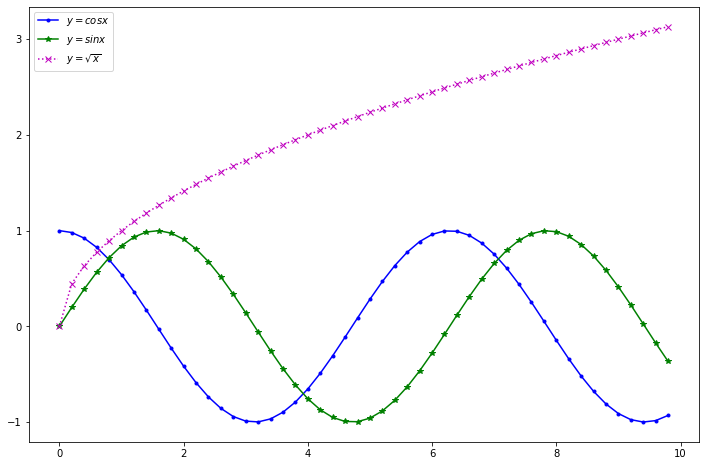

In [66]:
# 绘制 3 条函数曲线（默认.plot()是折线图）
# $y=\sqrt{x}$
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(x, y1, color='blue', linewidth=1.5, linestyle='-', marker='.', label=r'$y = cos{x}$')
plt.plot(x, y2, color='green', linewidth=1.5, linestyle='-', marker='*', label=r'$y = sin{x}$')
plt.plot(x, y3, color='m', linewidth=1.5, linestyle='dotted', marker='x', label=r'$y = \sqrt{x}$')
# 放置图例最佳位置
plt.legend(loc=0)

#### 设置坐标轴

可通过如下代码，移动坐标轴 spines

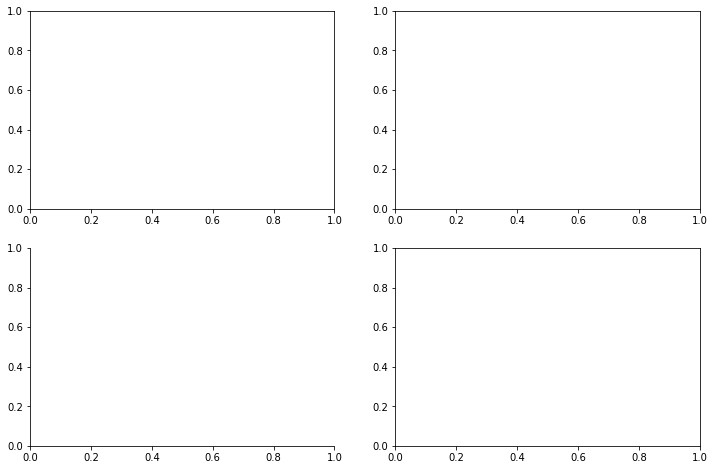

In [26]:
# 坐标轴上移
# 设置一个一行一列的图，ax为当前第一个图
# ax = plt.subplot(111)
# 设置ax为两行两列的图，ax为当前第一个子图
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax = plt.subplot(2,2,3)
ax2 = plt.subplot(2,2,4)

# 去掉右边和上边的边框线：设置框线颜色为无色（spines为轴）
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 移动下边边框线，相当于移动 X 轴：设置框线的起始位置，从0开始
ax.xaxis.set_ticks_position('bottom')    
ax.spines['bottom'].set_position(('data', 0))

# 移动左边边框线，相当于移动 y 轴
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

([<matplotlib.axis.YTick at 0x10f5b13c8>,
 <a list of 6 Text yticklabel objects>)

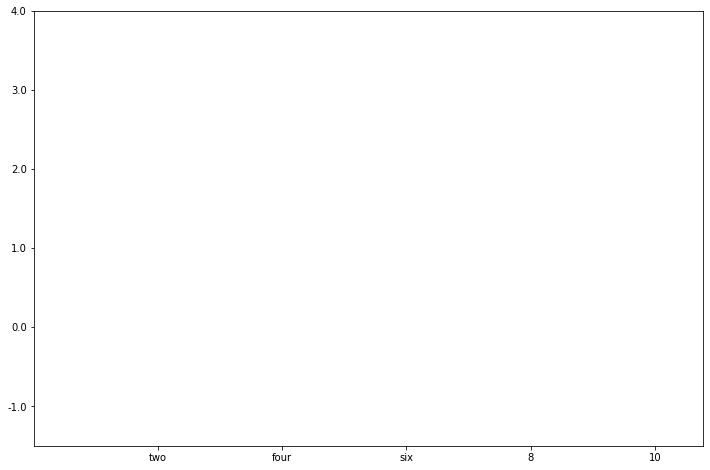

In [36]:
# 设置 x, y 轴的刻度取值范围
plt.xlim(x.min()*1.1, x.max()*1.1)
plt.ylim(-1.5, 4.0)

# 设置 x, y 轴的刻度标签值（指定哪个位置会有预设刻度值标签值）
plt.xticks([2, 4, 6, 8, 10], [r'two', r'four', r'six', r'8', r'10'])
plt.yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], [r'-1.0', r'0.0', r'1.0', r'2.0', r'3.0', r'4.0'])

#### 设置 X、Y 坐标轴和标题

Text(0, 0.5, '$y = f(x)$')

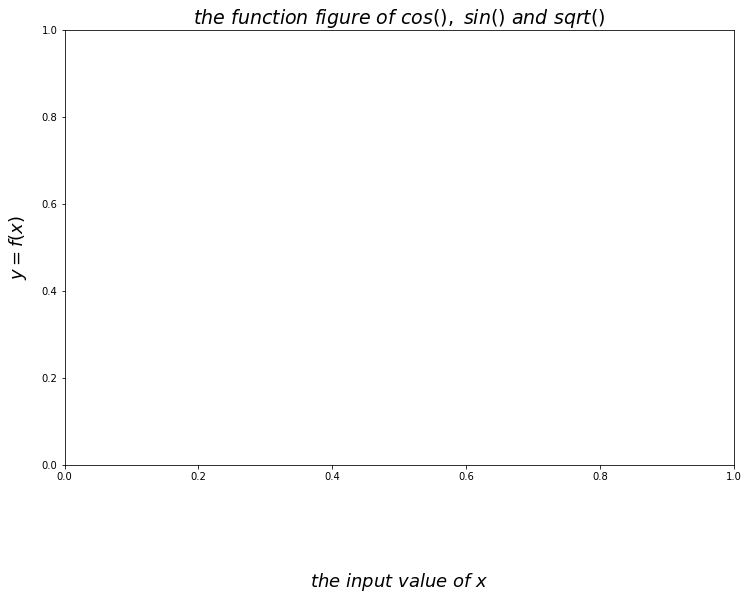

In [44]:
# 设置标题（r表示不转义raw，$表示公式解析）
plt.title(r'$the \ function \ figure \ of \ cos(), \ sin() \ and \ sqrt()$', fontsize=19)

# 设置x轴、y轴（labelpad表示距离轴线的距离）
plt.xlabel(r'$the \ input \ value \ of \ x$', fontsize=18, labelpad=88.8)
plt.ylabel(r'$y = f(x)$', fontsize=18, labelpad=12.5)

#### 设置文字描述、注解

Text(0.8, 0.8, '$y \\in [-1.0, \\ 4.0]$')

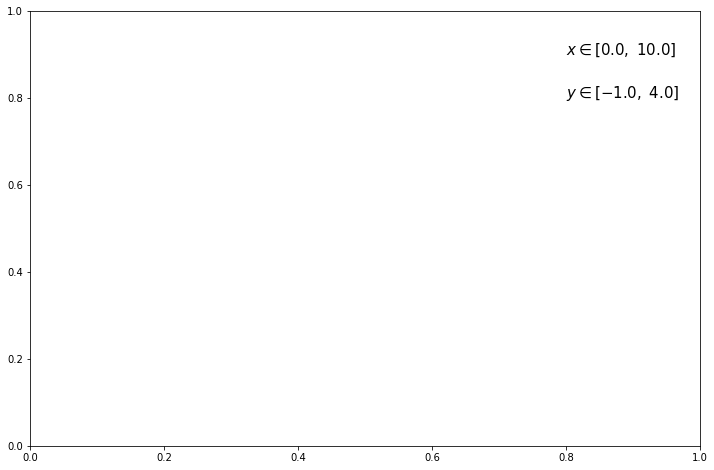

In [46]:
# 在数据图中坐标位置添加文字描述 text：
plt.text(0.8, 0.9, r'$x \in [0.0, \ 10.0]$', color='k', fontsize=15)
plt.text(0.8, 0.8, r'$y \in [-1.0, \ 4.0]$', color='k', fontsize=15)

Text(8.002, 2.83, '$2\\sqrt{2}$')

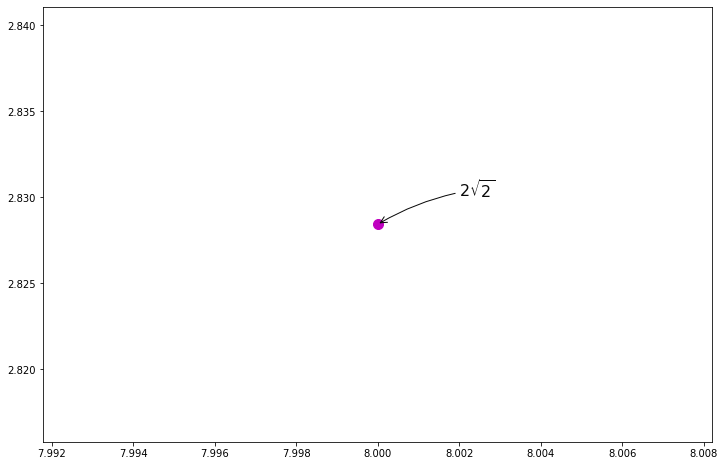

In [59]:
# 在数据图中给特殊点添加注解 annotate：
# 使用散点图放大当前点：横坐标为8，纵坐标为√8，散点大小为100，颜色为m紫色
plt.scatter([8,],[np.sqrt(8),], 100, color ='m')

# 使用annotate箭头指向xy处散点：在xytext位置处添加注释文本r'$2\sqrt{2}$'，定义字体大小和颜色，arrowprops以字典定义箭头形态
plt.annotate(r'$2\sqrt{2}$', xy=(8, np.sqrt(8)), xytext=(8.002, 2.83), fontsize=16, color='#090909', arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.1', color='#090909'))

# （具体情况使用help()查询）
# help(plt.annotate) # 在这里面查找arrowprops

#### 设置图例

作用：在图中标出每条线的说明

可使用如下两种方式，给绘图设置图例：
* 1: 在 plt.plot 函数中添加 label 参数后，使用 `plt.legend(loc='upper right')`
* 2: 不使用参数 label, 直接使用如下命令：

![](./img/legend.png)

#### 网格线开关

可使用如下代码，给绘图设置网格线：

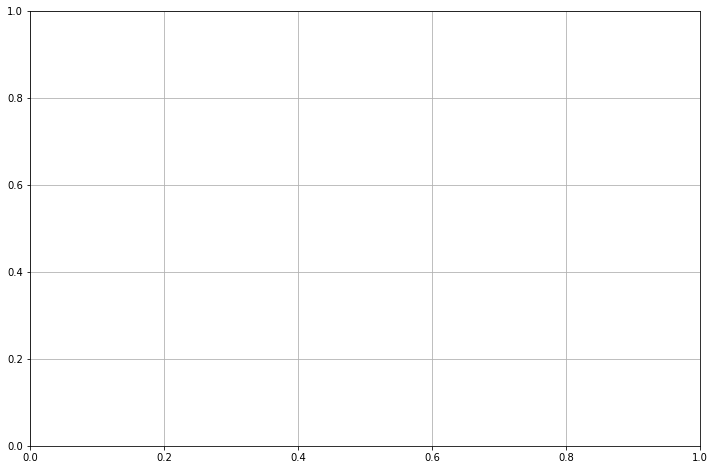

In [69]:
# 显示网格线
plt.grid(True)

#### 显示与图像保存

In [83]:
# 保存图像（前提是目录要存在，一定要先保存，再plt.show()）
plt.savefig('./figures/plot3d_ex.png',dpi=48)

# 显示图像
plt.show()

<Figure size 864x576 with 0 Axes>

### 完整的绘制程序

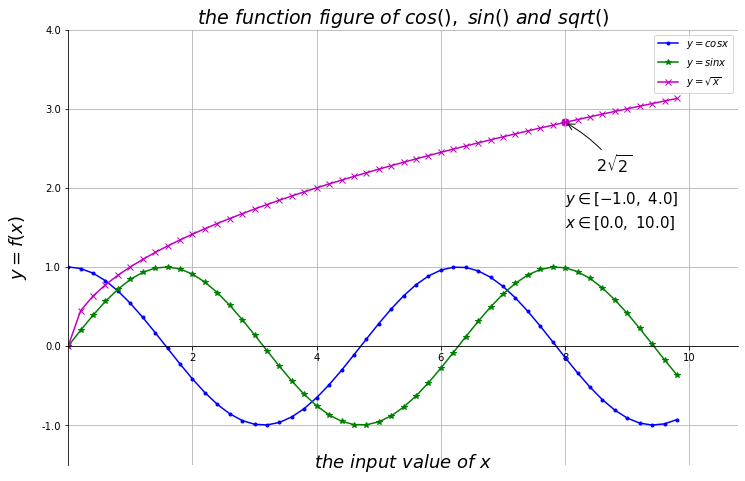

In [80]:
#coding:utf-8
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# 定义数据部分
x = np.arange(0., 10, 0.2)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.sqrt(x)

# 绘制 3 条函数曲线
plt.plot(x, y1, color='blue', linewidth=1.5, linestyle='-', marker='.', label=r'$y = cos{x}$')
plt.plot(x, y2, color='green', linewidth=1.5, linestyle='-', marker='*', label=r'$y = sin{x}$')
plt.plot(x, y3, color='m', linewidth=1.5, linestyle='-', marker='x', label=r'$y = \sqrt{x}$')

# 坐标轴上移
ax = plt.subplot(111)
ax.spines['right'].set_color('none')     # 去掉右边的边框线
ax.spines['top'].set_color('none')       # 去掉上边的边框线

# 移动下边边框线，相当于移动 X 轴
ax.xaxis.set_ticks_position('bottom')    
ax.spines['bottom'].set_position(('data', 0))

# 移动左边边框线，相当于移动 y 轴
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

# 设置 x, y 轴的取值范围
plt.xlim(x.min()*1.1, x.max()*1.1)
plt.ylim(-1.5, 4.0)

# 设置 x, y 轴的刻度值
plt.xticks([2, 4, 6, 8, 10], [r'2', r'4', r'6', r'8', r'10'])
plt.yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], 
    [r'-1.0', r'0.0', r'1.0', r'2.0', r'3.0', r'4.0'])

# 添加文字
plt.text(8, 1.5, r'$x \in [0.0, \ 10.0]$', color='k', fontsize=15)
plt.text(8, 1.8, r'$y \in [-1.0, \ 4.0]$', color='k', fontsize=15)

# 特殊点添加注解
plt.scatter([8,],[np.sqrt(8),], 50, color ='m')  # 使用散点图放大当前点
plt.annotate(r'$2\sqrt{2}$', xy=(8, np.sqrt(8)), xytext=(8.5, 2.2), fontsize=16, color='#090909', arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.1', color='#090909'))

# 设置标题、x轴、y轴
plt.title(r'$the \ function \ figure \ of \ cos(), \ sin() \ and \ sqrt()$', fontsize=19)
plt.xlabel(r'$the \ input \ value \ of \ x$', fontsize=18, labelpad=88.8)
plt.ylabel(r'$y = f(x)$', fontsize=18, labelpad=12.5)

# 设置图例及位置
plt.legend(loc='best')    
# plt.legend(['cos(x)', 'sin(x)', 'sqrt(x)'], loc='up right')

# 显示网格线
plt.grid(True)    

# 保存图像
plt.savefig('./figures/function_figure.png')

# 显示绘图
plt.show()

### Matplotlib画常用图形

<font color='red'>**matplotlib的工具手册**</font>在[这里](http://matplotlib.org/api/pyplot_api.html)可以查到

* 曲线图：  `matplotlib.pyplot.plot(data)`
* 灰度/直方图：`matplotlib.pyplot.hist(data)`
* 散点图：`matplotlib.pyplot.scatter(data)`
* 箱式/箱线图：`matplotlib.pyplot.boxplot(data)`

Note：  
通常输入的x和y是numpy.array，如果是从DataFrame, Series中直接使用Matplotlib画图有时候会出错，所以稳妥做法是将数据转换成array

* 从df中取出某一字段值，然后转化成values  
`array = df['columns'].values`

* 所有值化成array  
`array = df.values`

#### 曲线图

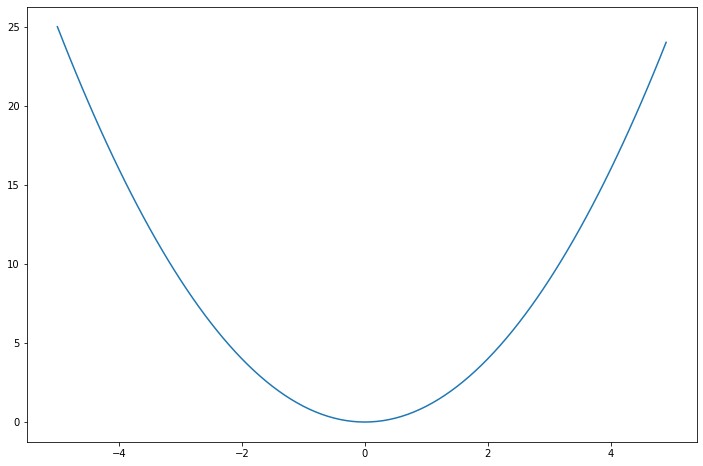

In [89]:
x = np.arange(-5,5,0.1)
y = x ** 2
plt.plot(x,y)

#### 直方图

(array([  4.,  19.,  73., 132., 215., 242., 183.,  91.,  25.,  16.]), array([-3.21486744, -2.59340848, -1.97194952, -1.35049056, -0.7290316 ,
       -0.10757263,  0.51388633,  1.13534529,  1.75680425,  2.37826321,
        2.99972217]), <a list of 10 Patch objects>)

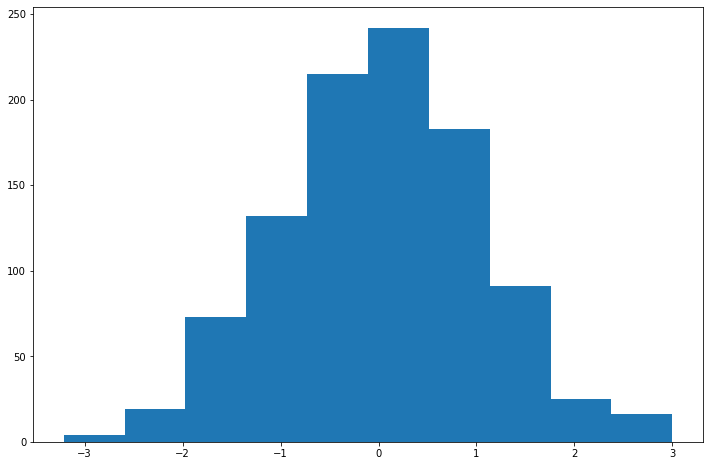

In [88]:
x = np.random.normal(size=1000)
plt.hist(x, bins=10)

#### 散点图

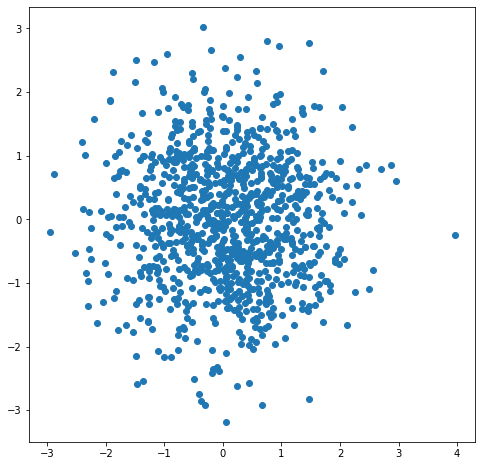

In [90]:
plt.rcParams["figure.figsize"] = (8,8)
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
plt.scatter(x,y)

#### 箱线图

{'whiskers': [<matplotlib.lines.Line2D object at 0x11779c710>, <matplotlib.lines.Line2D object at 0x11779ca58>], 'caps': [<matplotlib.lines.Line2D object at 0x11779cda0>, <matplotlib.lines.Line2D object at 0x117798128>], 'boxes': [<matplotlib.lines.Line2D object at 0x11779c400>], 'medians': [<matplotlib.lines.Line2D object at 0x117798470>], 'fliers': [<matplotlib.lines.Line2D object at 0x1177987b8>], 'means': []}

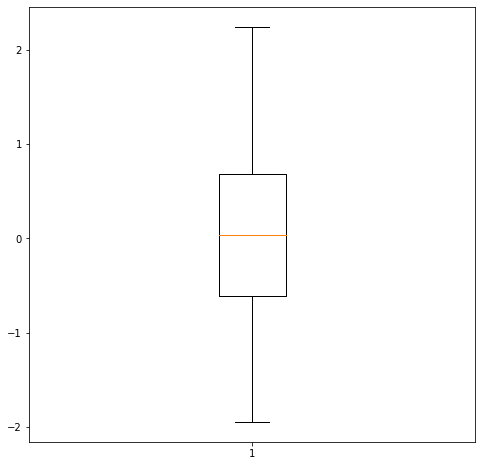

In [95]:
plt.rcParams["figure.figsize"] = (8,8)
x = np.random.normal(size=100)
plt.boxplot(x)

### Matplotlib应用案例——自行车租赁数据分析与可视化
**Note：**  
将本Notebook当做Matplotlib使用时的模板，重点关注：
- 我们选择了什么样的图，去做了何种分析？
- 我们从分析到的结果中看出来了什么？
- 这个模板如何去使用？  

#### 步骤1：获得数据并预处理

##### 下载并解压数据

In [118]:
import urllib # 获取网络数据
import shutil # 文件操作
import zipfile # 压缩解压
import os

import warnings
warnings.filterwarnings('ignore')

# ① 建立临时目录bike_data，如果已存在bike_data文件夹，则删除该文件夹并新建一个bike_data文件夹
try:
    os.system('mkdir bike_data')
except:
    os.system('rm -rf bike_data; mkdir bike_data')

# ② 网络地址下载zip数据包
# 网络地址
data_source = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
# 本地下载路径名
zipname = 'bike_data/Bike-Sharing-Dataset.zip' # 拼接文件和路径
# 使用urllib库获得数据
urllib.request.urlretrieve(data_source, zipname)

# ③ 将下载下来的zipname作为一个ZipFile解压对象，处理压缩文件
zip_ref = zipfile.ZipFile(zipname, 'r')
# 将所有解压后的文件保存在bike_data路径下
zip_ref.extractall('bike_data')
# 关闭解压对象
zip_ref.close()

256

('bike_data/Bike-Sharing-Dataset.zip', <http.client.HTTPMessage object at 0x114c85828>)

In [38]:
# 下载文件模板
# import urllib
# data_source = 'https://github.com/mwaskom/seaborn-data/raw/master/tips.csv'
# file_name = './data/tips.csv'
# urllib.request.urlretrieve(data_source, file_name)

##### 导入并简易数据处理

In [17]:
# import pandas as pd
# import pandas_profiling
# pandas_profiling.ProfileReport(daily_data)

In [8]:
import pandas as pd # 读取数据到DataFrame
import warnings
warnings.filterwarnings('ignore')

# ④ 读取day.csv文件
daily_path = 'bike_data/day.csv'
daily_data = pd.read_csv(daily_path)

# 把dteday列数据转换成日期数据（str->pd.timestamps），以便快速了解年、月、日、星期等信息
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])
# type(daily_data['dteday'][0])

# 整理出不关注的数据列，并将其剔除（inplace=true在对象上直接操作，而非作为返回值剔除）
drop_list = ['instant', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum'] 
daily_data.drop(drop_list, inplace = True, axis = 1)

daily_data.head() # 看一看数据：temp温度，windspeed风速、casual微信扫码、registered用app扫码，cnt两种方式数量加在一起的count


,dteday,weekday,temp,windspeed,casual,registered,cnt
0,2011-01-01,6,0.344167,0.160446,331,654,985
1,2011-01-02,0,0.363478,0.248539,131,670,801
2,2011-01-03,1,0.196364,0.248309,120,1229,1349
3,2011-01-04,2,0.200000,0.160296,108,1454,1562
4,2011-01-05,3,0.226957,0.186900,82,1518,1600


#### 步骤2：配置参数

In [9]:
from __future__ import division, print_function # 引入3.x版本的除法和打印
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# 在notebook中显示绘图结果
%matplotlib inline

# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib

# 设置图片尺寸 14" x 7"
# rc: resource configuration
matplotlib.rc('figure', figsize = (14, 7))

# 设置字体 14
matplotlib.rc('font', size = 14)

# 不显示顶部和右侧的坐标线
matplotlib.rc('axes.spines', top = False, right = False)

# 不显示网格
matplotlib.rc('axes', grid = False)

# 设置背景颜色是白色
matplotlib.rc('axes', facecolor = 'white') 

#### 步骤3：关联分析

##### 散点图
* 分析变量关系（相关性）  
    * 分析共享单车开锁数和温度、风速之间的关系
        - 气温高了，温度变好了，大家愿意去骑共享单车
        - 风速大了，大家就更愿意在微风或者无风的情况下骑共享单车

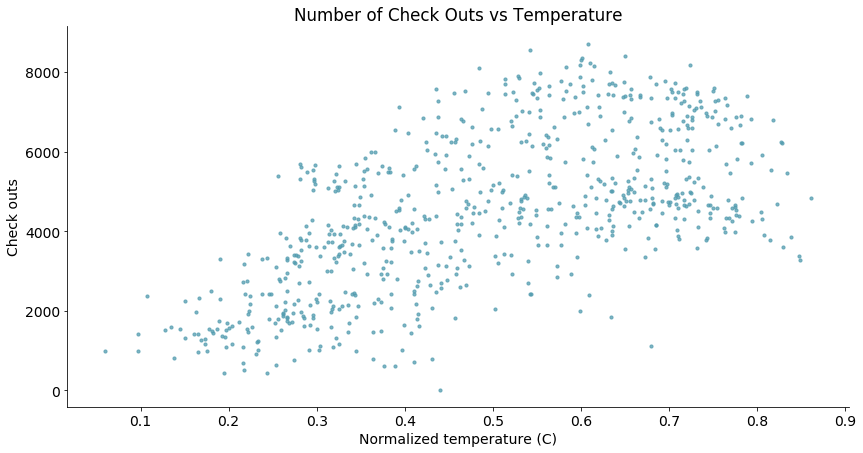

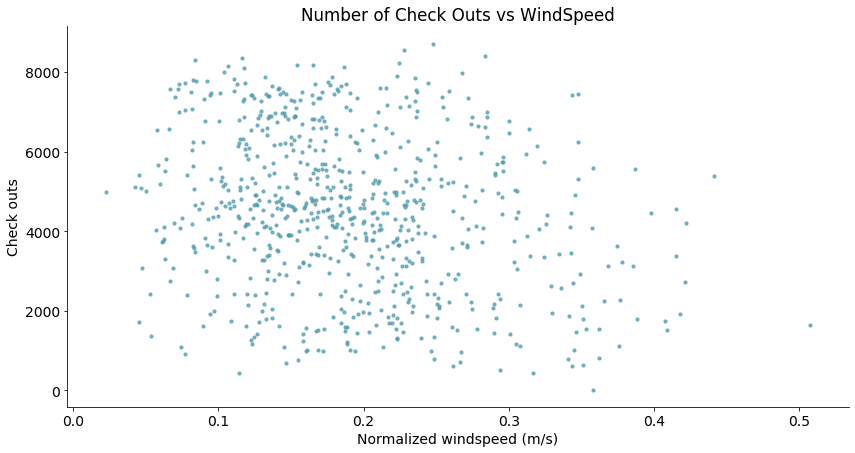

In [10]:
from matplotlib import font_manager

# # 创建字体属性对象，设置字体和大小（打开与关闭没发现影响）
# fontP = font_manager.FontProperties()
# fontP.set_family('Bearpaw')
# fontP.set_size(14)

# 包装一个散点图的函数便于复用
def scatterplot(x_data, y_data, x_label, y_label, title):

    # 创建一个绘图对象
    fig, ax = plt.subplots()

    # 设置数据、点的大小、点的颜色和透明度
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75) # http://www.114la.com/other/rgb.htm

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# 绘制温度与开锁人数的散点图
scatterplot(x_data = daily_data['temp'].values
            , y_data = daily_data['cnt'].values
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')

# 绘制风速与开锁人数的散点图
scatterplot(x_data = daily_data['windspeed'].values
            , y_data = daily_data['cnt'].values
            , x_label = 'Normalized windspeed (m/s)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs WindSpeed')

##### 曲线图
* 拟合变量关系
    - 发现温度和开锁人数之间有线性关系，就用函数将他们之间的趋势定量体现出来

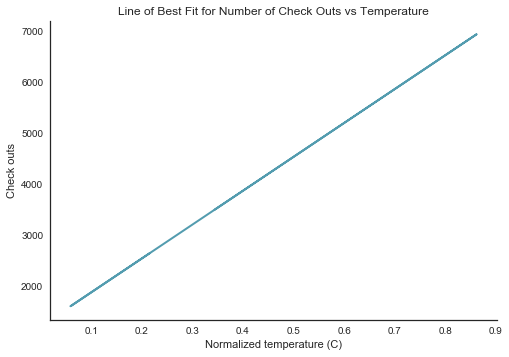

In [25]:
# 线性回归
import statsmodels.api as sm

# 获得汇总信息
from statsmodels.stats.outliers_influence import summary_table 

# 线性回归增加常数项 y=kx+b
x = sm.add_constant(daily_data['temp']) 
y = daily_data['cnt']

# 普通最小二乘模型，ordinary least square model
regr = sm.OLS(y, x) 
res = regr.fit()

# 从模型获得拟合数据
# 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
st, data, ss2 = summary_table(res, alpha=0.05)
fitted_values = data[:,2]

# 包装曲线绘制函数
def lineplot(x_data, y_data, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制拟合曲线，lw=linewidth，alpha=transparancy
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# 调用绘图函数
lineplot(x_data = daily_data['temp']
         , y_data = fitted_values
         , x_label = 'Normalized temperature (C)'
         , y_label = 'Check outs'
         , title = 'Line of Best Fit for Number of Check Outs vs Temperature')

##### 带置信区间的曲线图
* 评估曲线拟合结果

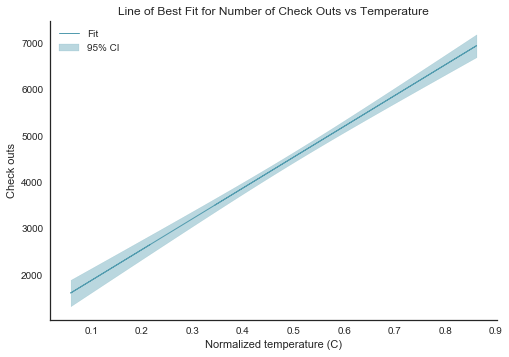

In [27]:
# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# 创建置信区间DataFrame，上下界
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = daily_data['temp']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序

# 绘制置信区间
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制预测曲线（alpha指定的是透明度）
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    
    # 绘制置信区间，顺序填充
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 显示图例，配合label参数，loc=“best”自适应方式
    ax.legend(loc = 'best')

# Call the function to create plot
lineplotCI(x_data = daily_data['temp']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'Normalized temperature (C)'
           , y_label = 'Check outs'
           , title = 'Line of Best Fit for Number of Check Outs vs Temperature')

##### 双坐标曲线图
* 曲线拟合不满足置信阈值时，考虑增加独立变量
* 分析不同尺度多变量的关系

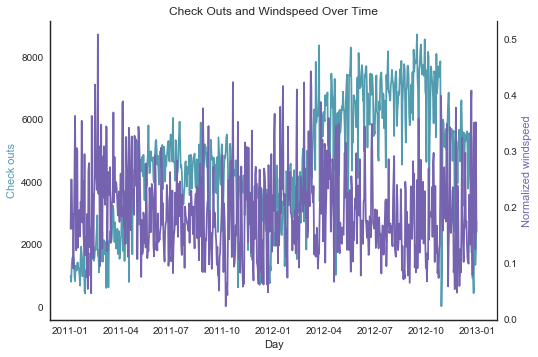

In [29]:
# 双纵坐标绘图函数
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):
    _, ax1 = plt.subplots()
    ax1.plot(x_data, y1_data, color = y1_color)
    
    # 添加标题和坐标说明
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)

    # 以第一个坐标系ax1产出另外一个坐标系ax2，两个绘图对象共享横坐标轴x
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    # 右侧坐标轴可见
    ax2.spines['right'].set_visible(True)

# 调用绘图函数
lineplot2y(x_data = daily_data['dteday']
           , x_label = 'Day'
           , y1_data = daily_data['cnt']
           , y1_color = '#539caf'
           , y1_label = 'Check outs'
           , y2_data = daily_data['windspeed']
           , y2_color = '#7663b0'
           , y2_label = 'Normalized windspeed'
           , title = 'Check Outs and Windspeed Over Time')

#### 步骤4：分布分析

- 针对单变量

##### 灰度图
* 粗略区间计数  
使用app用户扫码的频率

array([ 14.,  44.,  79.,  80., 113., 144.,  85.,  71.,  57.,  44.])

array([  20. ,  712.6, 1405.2, 2097.8, 2790.4, 3483. , 4175.6, 4868.2,
       5560.8, 6253.4, 6946. ])

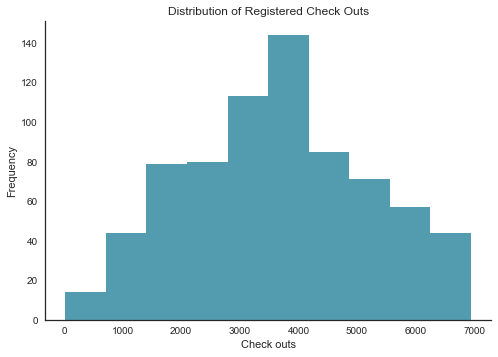

In [38]:
# 绘制灰度图的函数
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    res = ax.hist(data, color = '#539caf', bins=10) # 设置bin的数量
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    return res

# 绘图函数调用
res = histogram(data = daily_data['registered']
           , x_label = 'Check outs'
           , y_label = 'Frequency'
           , title = 'Distribution of Registered Check Outs')
res[0] # value of bins
res[1] # boundary of bins

##### 堆叠直方图
* 比较两个分布
    * registered：注册的分布，正态分布，why（交押金之后，扫开是呈现正态分布的）
    * casual：偶然的分布，疑似指数分布，why（没交押金，可能偶尔在微信上扫开的次数会比经常在微信上扫开的要多）

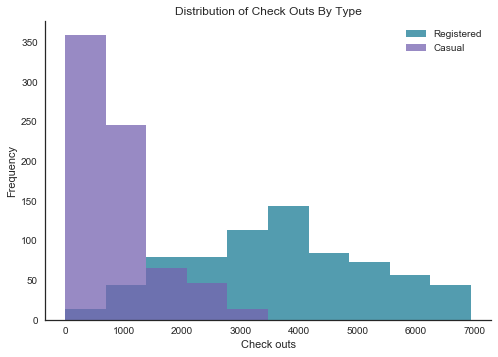

In [39]:
# 绘制堆叠的直方图
def overlaid_histogram(data1, data1_name, data1_color, data2, data2_name, data2_color, x_label, y_label, title):
    # 归一化数据区间，对齐两个直方图的bins
    max_nbins = 10
    
    #计算边界
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth) # 生成直方图bins区间

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

# Call the function to create plot
overlaid_histogram(data1 = daily_data['registered']
                   , data1_name = 'Registered'
                   , data1_color = '#539caf'
                   , data2 = daily_data['casual']
                   , data2_name = 'Casual'
                   , data2_color = '#7663b0'
                   , x_label = 'Check outs'
                   , y_label = 'Frequency'
                   , title = 'Distribution of Check Outs By Type')

##### 密度图
* 精细刻画概率分布  

KDE: kernal density estimate（概率密度曲线）

$
\hat{f}_h(x) = \frac{1}{n}\sum\limits_{i=1}^n K_h(x-x_i) = \frac{1}{nh}\sum\limits_{i=1}^n K(\frac{x-x_i}{h})
$

<class 'scipy.stats.kde.gaussian_kde'>

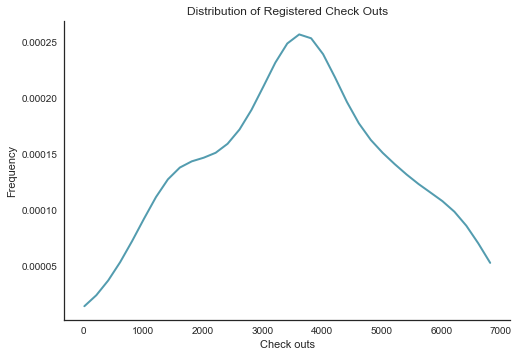

In [41]:
# 计算概率密度
from scipy.stats import gaussian_kde
data = daily_data['registered']

# 使用高斯进行拟合
density_est = gaussian_kde(data) # kernal density estimate: https://en.wikipedia.org/wiki/Kernel_density_estimation

# 控制平滑程度，数值越大，越平滑
density_est.covariance_factor = lambda : .3
density_est._compute_covariance()
x_data = np.arange(min(data), max(data), 200)

# 绘制密度估计曲线
def densityplot(x_data, density_est, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.plot(x_data, density_est(x_data), color = '#539caf', lw = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# 调用绘图函数
densityplot(x_data = x_data
            , density_est = density_est
            , x_label = 'Check outs'
            , y_label = 'Frequency'
            , title = 'Distribution of Registered Check Outs')

type(density_est)

#### 步骤5：组间分析

* 组间定量比较
* 分组粒度
* 组间聚类

##### 柱状图
* 一级类间均值方差比较
    * 一组数据有很多的星期一到星期天，如何在一幅图上体现其分布状况
        - 柱状图的高度是均值
        - 柱子上的线errorbar是标准差std

* 这里与最下面的<u>**箱线图**</u>内容相同

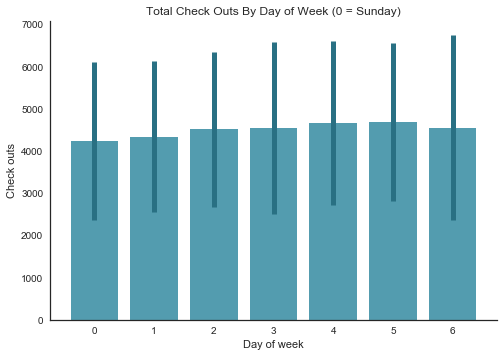

In [42]:
# 分天分析统计特征
mean_total_co_day = daily_data[['weekday', 'cnt']].groupby('weekday').agg([np.mean, np.std])
mean_total_co_day.columns = mean_total_co_day.columns.droplevel()

# 定义绘制柱状图的函数
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # 柱状图
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # 绘制方差
    # ls='none'去掉bar之间的连线
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# 绘图函数调用
barplot(x_data = mean_total_co_day.index.values
        , y_data = mean_total_co_day['mean']
        , error_data = mean_total_co_day['std']
        , x_label = 'Day of week'
        , y_label = 'Check outs'
        , title = 'Total Check Outs By Day of Week (0 = Sunday)')

In [43]:
mean_total_co_day.columns
daily_data[['weekday', 'cnt']].groupby('weekday').agg([np.mean, np.std])

Index(['mean', 'std'], dtype='object')

cnt             
                mean          std
weekday                          
0        4228.828571  1872.496629
1        4338.123810  1793.074013
2        4510.663462  1826.911642
3        4548.538462  2038.095884
4        4667.259615  1939.433317
5        4690.288462  1874.624870
6        4550.542857  2196.693009

##### 堆积柱状图
* 多级类间相对占比比较
    - 注意：这上面的百分比是提前算出来的，
        - 先计算`casual/cnt`和`registered/cnt`
        - 再使用plt绘制

In [44]:
mean_by_reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').mean()
mean_by_reg_co_day

,registered,casual
weekday,,
0,2890.533333,1338.295238
1,3663.990476,674.133333
2,3954.480769,556.182692
3,3997.394231,551.144231
4,4076.298077,590.961538
5,3938.000000,752.288462
6,3085.285714,1465.257143


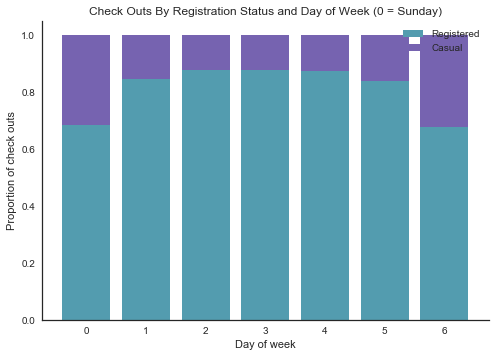

In [45]:
# 分天统计注册和偶然使用的情况
mean_by_reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').mean()
# 分天统计注册和偶然使用的占比
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# 绘制堆积柱状图
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

# 调用绘图函数
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Proportion of check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)')

* 从这幅图你看出了什么？工作日 VS 节假日
* 为什么会有这样的差别？
    - 从图上看出来：周末用casual的比例比较高，工作日用registered的比例更高：周末随手用微信扫开单车是完全合理的

##### 分组柱状图
* 多级类间绝对数值比较

In [46]:
mean_by_reg_co_day.head()

,registered,casual,total,reg_prop,casual_prop
weekday,,,,,
0,2890.533333,1338.295238,4228.828571,0.683531,0.316469
1,3663.990476,674.133333,4338.123810,0.844603,0.155397
2,3954.480769,556.182692,4510.663462,0.876696,0.123304
3,3997.394231,551.144231,4548.538462,0.878830,0.121170
4,4076.298077,590.961538,4667.259615,0.873381,0.126619


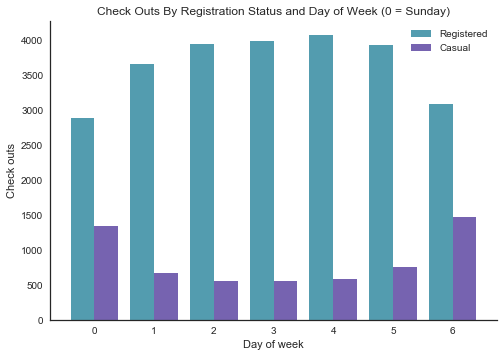

In [48]:
# 绘制分组柱状图的函数(plt画起来会稍微复杂：调整柱子宽度和中心偏移)
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# 调用绘图函数
groupedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['registered'], mean_by_reg_co_day['casual']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)')

* 偏移前：`ind_width/2`
* 偏移后：`total_width/2`
* 偏移量：`total_width/2-ind_width/2`

##### 箱线图
* 多级类间数据分布比较
* 柱状图 + 堆叠灰度图
    - 重点：看数据分布：看一周七天中，哪一天分布更加集中，哪一天分布较为分散（集中在更高一点的checkout还是更低一点的checkout）

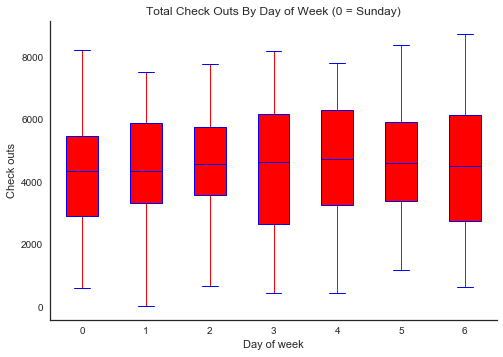

In [49]:
# 只需要指定分类的依据，就能自动绘制箱式图
days = np.unique(daily_data['weekday'])
bp_data = []
for day in days:
    bp_data.append(daily_data[daily_data['weekday'] == day]['cnt'].values)

# 定义绘图函数
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# 调用绘图函数
boxplot(x_data = days
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Day of week'
        , y_label = 'Check outs'
        , title = 'Total Check Outs By Day of Week (0 = Sunday)')

* 关联分析、数值比较：散点图、曲线图
* 分布分析：灰度图（直方图）、密度图KDE
* 涉及分类的分析：柱状图、箱线图

## Seaborn
- 关注点：
    - 不同图形的绘制？
    - 不同图形主要是在什么样的场景下使用？
    - 从图形中能够帮助我们分析出什么？
    
- **连续变量**做分析，**离散变量**做分组  

### 需要掌握的11个函数
1. 单维度数据分布 -- 直方图（归一化后）   
`sns.distplot(x, kde=True, bins=20, rug=True)`

2. 双变量分布  
`sns.jointplot(x="x", y="y", data=df)`

3. 两两变量间的关系  
`sns.pairplot(iris)`

4. 按维度产生格子  
`sns.PairGrid(iris)`

5. 散点图 + 线性回归 + 95%置信区间  
`sns.lmplot()`  
    - 参数：**hue**, col, row
    
6. 柱状图  
    - 统计柱状图
    `sns.barplot()`

    - 灰色柱状图
    `sns.countplot()`

7. 条状图  
`sns.stripplot()`

8. 蜂群图  
`sns.swarmplot()`

9. 箱线图  
`sns.boxplot()`

10. 点图  
`sns.pointplot()`

11. 画指定类型图  
`sns.factorplot()`

In [2]:
import time
import datetime
import numpy as np

import pandas as pd
from pandas import DataFrame
from pandas import Series

import matplotlib.pyplot as plt
import matplotlib.dates as mpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
%matplotlib inline

from scipy import stats, integrate

import warnings
warnings.filterwarnings("ignore")

# 因为seaborn底层是plt，所以要倒入matplotlib（seaborn和matplotlib可以搭配使用）
import seaborn as sns
# 自动调色板
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))


### seaborn单维度与关联维度分析
#### 单变量分布（灰度/直方图）

- 拿到一份电商数据，会看单维度分布：
    - 年龄分布
    - 收入状况分布
    - 历史购买某商品类型分布
    - 商品价格分布
    - 不同类型商品数量分布，等

##### 灰度图
- 参数选择：
    - 使用kde画概率密度曲线
    - bins调整分隔范围
    - rug结合实例一起看（指导选出最合适的bins）
        - bins太少了，看不出分布
        - bins太多了，看有的区间段为空，没有值


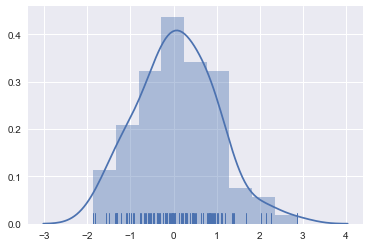

In [3]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True, rug=True)

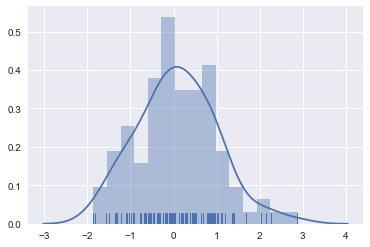

In [4]:
sns.distplot(x, kde=True, bins=15, rug=True)

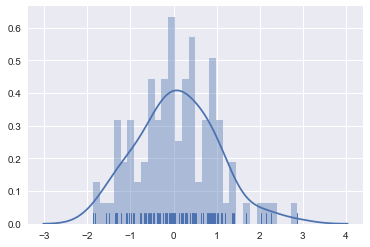

In [5]:
sns.distplot(x, kde=True, bins=30, rug=True)

##### 核密度估计KDE
- 通过观测以估计概率密度函数的形状，用待定系数法求概率密度函数。  
- 作用：体现数据的密集程度，每个样本点处都用高斯分布曲线拟合，将所有点处的高斯分布值叠加之后，拟合成一条光滑曲线（样本密集的地方曲线就比较高）

核密度估计的步骤：
* 每一个观测附近用一个正态分布曲线近似
* 叠加所有观测的正态分布曲线
* 归一化

但是一般在`sns.distplot()`中使用kde参数添加曲线，很少单独绘制

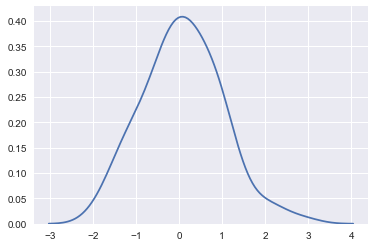

In [6]:
sns.kdeplot(x)

bandwidth的概念：用于近似的正态分布曲线的宽度。

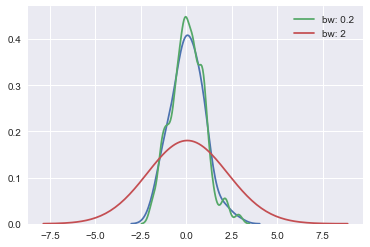

In [7]:
# 原始曲线
sns.kdeplot(x)
# 用小宽度高斯代表逐个点进行拟合
sns.kdeplot(x, bw=.2, label="bw: 0.2")
# 用大宽度高斯代表逐个点进行拟合
sns.kdeplot(x, bw=2, label="bw: 2")
# 展示图例
plt.legend()

##### 模型参数拟合
- 核密度估计是用gaussion函数进行拟合
- 可以是用其他函数，如：gamma分布对KDE进行拟合

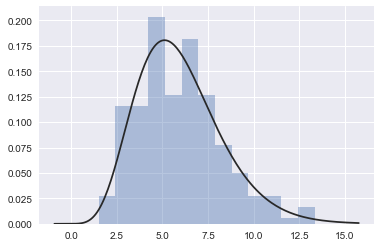

In [8]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

#### 双变量分布
- 变量之间的关联程度：散点图

##### 散点图

In [9]:
# 产生数据：两个相关的正态分布，各产生200个随机点
# 产生均值分别为0和1，协方差为矩阵的正态分布数据200个点
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df['x'].mean()
df['y'].mean()
df[['x','y']].cov()

,x,y
x,1.024947,0.558664
y,0.558664,1.110148


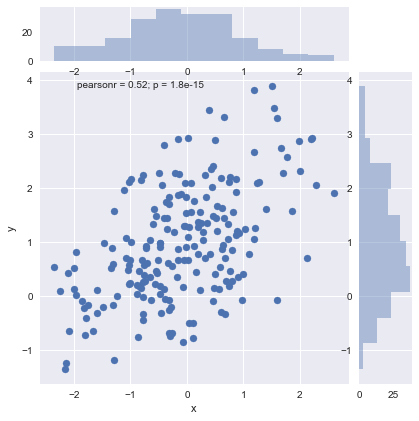

In [10]:
# 产生联合的散点图 和 各自的直方图
sns.jointplot(x="x", y="y", data=df)

##### 六角箱图
作用：
- 当散点图中点数量很多的时候，点非常密集，当点重叠在一起时，是分不清哪里更加密集的。
- 因此需要六角箱图将数据做聚合，数据越密集，六角形颜色越深，反之亦然。

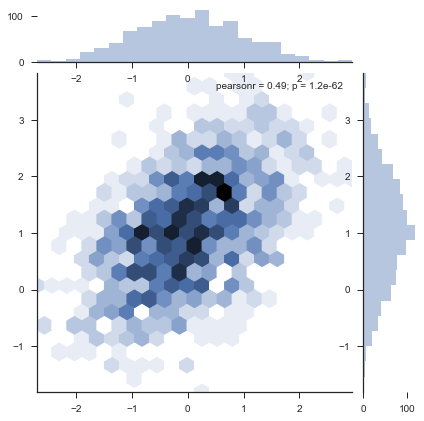

In [11]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="hex")

##### 核密度估计
- 刻画的是联合分布的密度，类似等高线

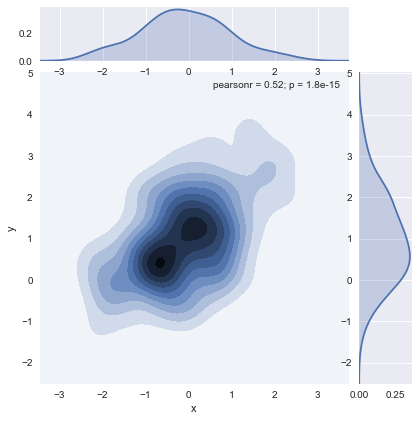

In [12]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

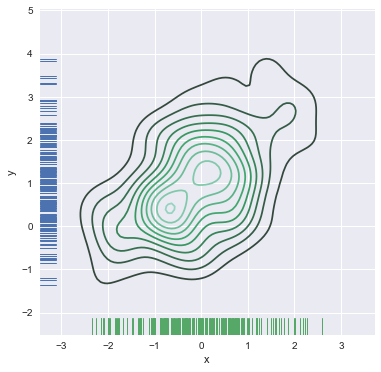

In [13]:
f, ax = plt.subplots(figsize=(6, 6))
# 绘制概率密度等高线
sns.kdeplot(df.x, df.y, ax=ax)
# 绘制具体的实例（当样本量非常大的时候，画实例非常耗时，需要看数据规模，因此数据量大的时候不建议使用）
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

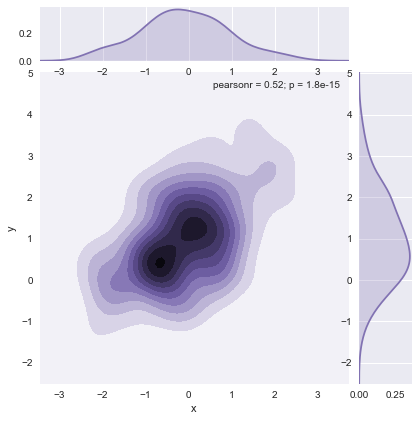

In [14]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
# g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
# g.set_axis_labels("$X$", "$Y$")

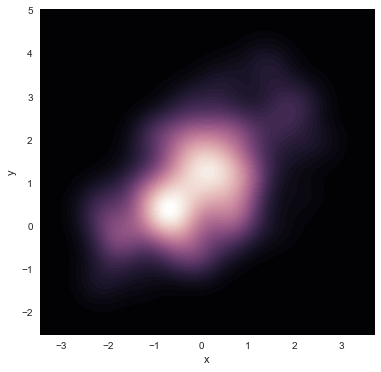

In [15]:
# 调整调色板，得到更炫酷效果
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

#### 数据集中的两两关系
- 背景：seaborn自带数据集iris，通过花瓣和花萼的长度和宽度来区分不同的花。想查看这4个变量间的两两关系。
- 当列数太多的时候，一起展示两两关系图片会非常小，因此需要先用`df.loc[]`取出关注的columns再绘制`pairplot()`
- 图解
    - 对角线：四个维度单变量分布的灰度图。
    - 非对角线：两两变量之间的散点图

In [23]:
iris = pd.read_csv("./data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### 离散绘图

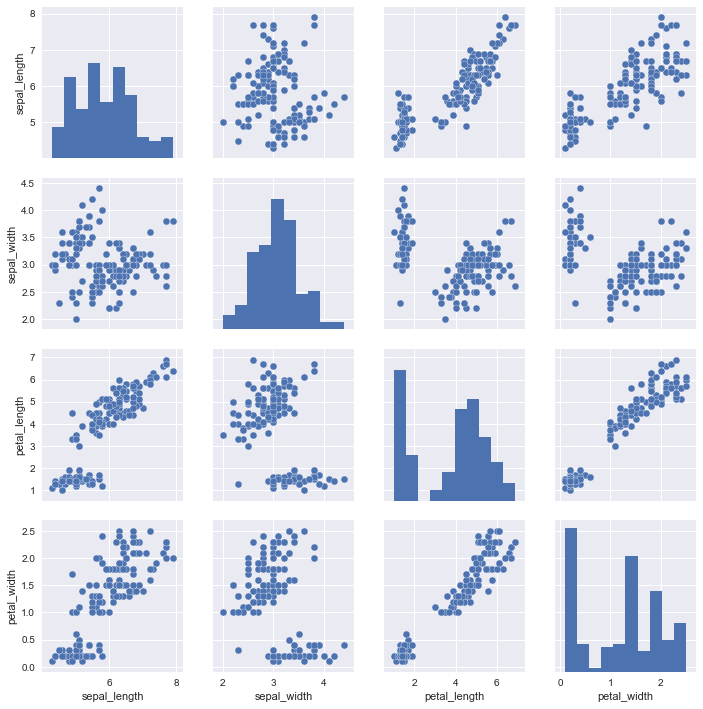

In [24]:
sns.pairplot(iris);

- 正相关
    - 花瓣长度和花萼长度
    - 花瓣长度与花瓣宽度
    - 花瓣宽度与花萼长度

##### 连续绘图（自定义绘图内容）

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


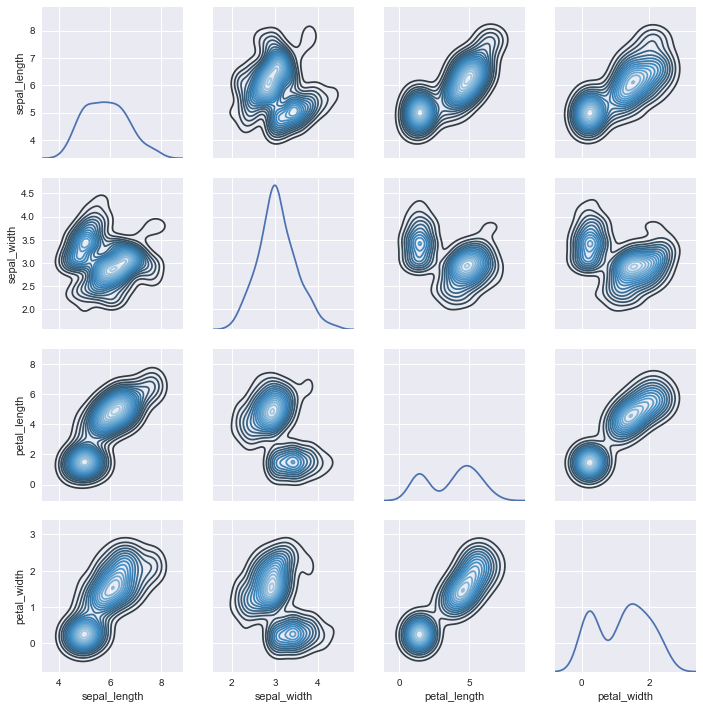

In [28]:
# 先产生iris维度平方的格子，4×4=16个格子
g = sns.PairGrid(iris)
# 所有对角线上，用kde绘制单变量的密度线
g.map_diag(sns.kdeplot)
# 非对角线用kde画两两变量的等高线
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20)

### seaborn高级分析-连续变量关联分析

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))

import warnings
warnings.filterwarnings("ignore")


In [3]:
tips = pd.read_csv('./data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips[tips['size']==1]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1


#### 绘制线性回归模型
连续值时，做线性回归最简单的方式：`散点图 + 线性回归 + 95%置信区间`

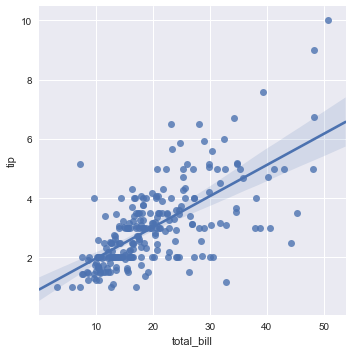

In [5]:
sns.lmplot(x="total_bill", y="tip", data=tips)

离散值时，只做线性回归走不通（吃饭人人数size，消费tip是连续值）

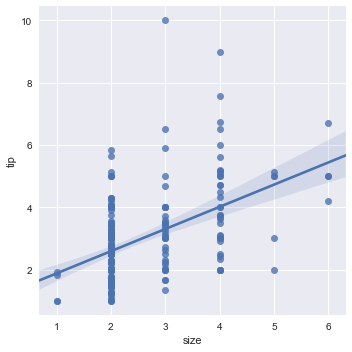

In [6]:
sns.lmplot(x="size", y="tip", data=tips)

**改进1：**
加入左右抖动x_jitter，左右甩一甩（如果点重合在一起或者离着非常近，就有效果），x_jitter越大，左右抖动幅度越大，但抖动太大就会离散

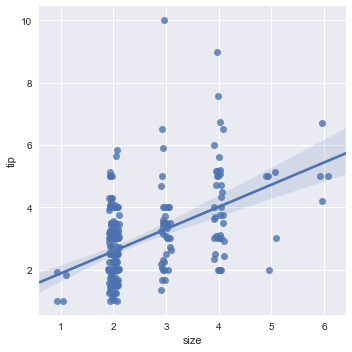

In [7]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.1)

**方法2：**
将离散点"人数size"先做统计，用<u>**该变量均值和置信区间**</u>代替散点

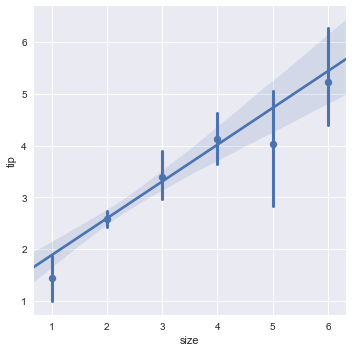

In [8]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean, ci=95)

#### 拟合不同模型
##### 线性拟合

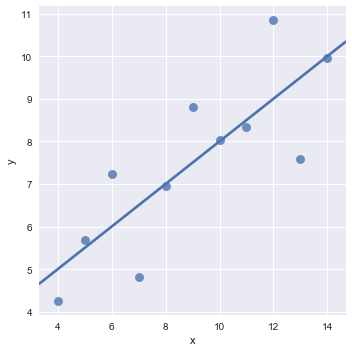

In [9]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={"s": 80})

##### 高阶拟合

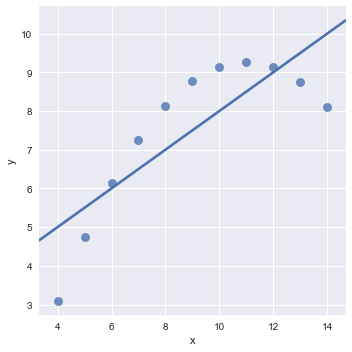

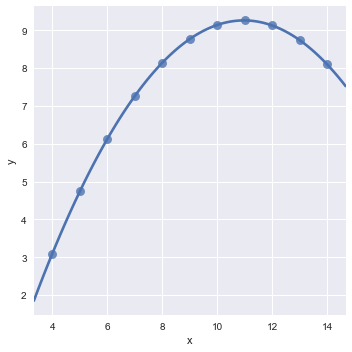

In [10]:
# 二次数据不能再用线性拟合，应该用order做高阶拟合
# 线性拟合效果
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80})

# 高阶拟合效果
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80})

##### 剔除异常点（使其不在拟合曲线上）
在`sns.lmplot()`将`robust=True`选项打开，使用统计方式剔除异常值

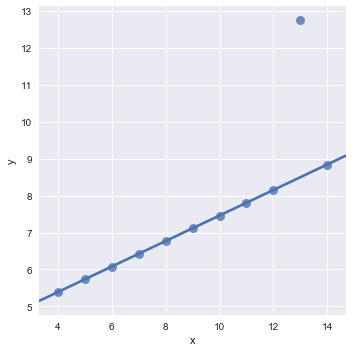

In [11]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80})

##### 拟合二值变量
- 线性拟合二值变量/分类问题，不太合适，应该用逻辑回归（sigmoid的s型曲线）。

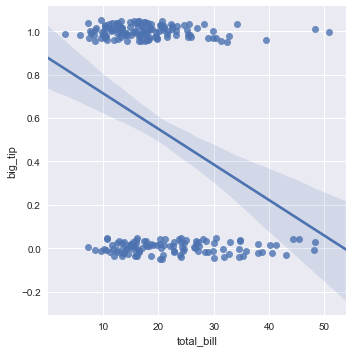

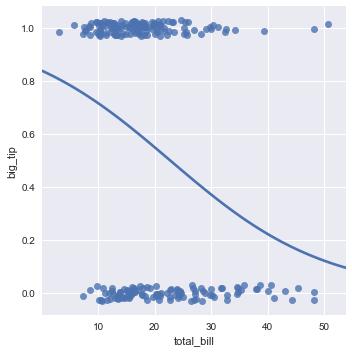

In [12]:
## 如果小费占总账单的15%以上，认定为大额小费（记为1），否则认定为非大额消费（记为0），在y上添加抖动
# 线性拟合
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.05)

# 逻辑回归
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03, ci=None)

##### 残差曲线--评价拟合效果
- 拟合效果好，结果呈现白噪声分布$N(0,σ2)$
- 拟合效果不好，结果分散

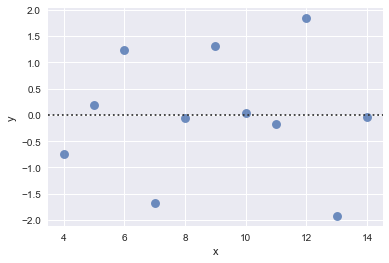

In [13]:
# 线性拟合，效果不好：
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80})

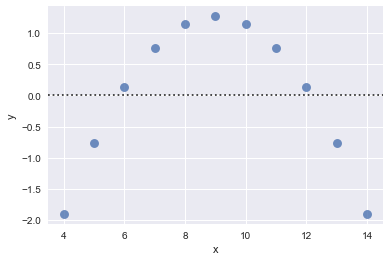

In [14]:
# 二次拟合，效果较好：
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), scatter_kws={"s": 80})

#### 探索变量间关系
- 重点变量：`hue`，做分组，与pandas中的groupby作用相同（其中，hue的对象一定是离散的）

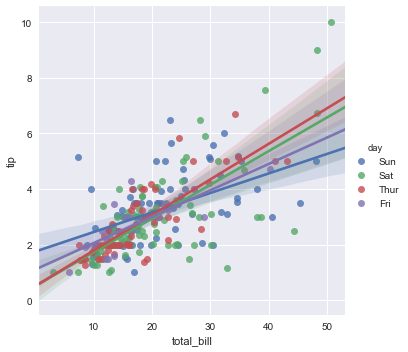

In [15]:
# 案例1：想根据weekday来查看总费用与小费之间的关系（data是数据源，官网上下的tips变量）
sns.lmplot(x="total_bill", y="tip", hue="day", data=tips)

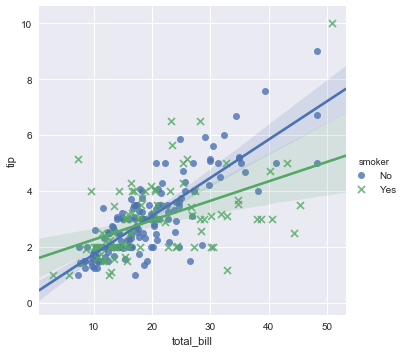

In [16]:
# 案例2：想根据是否为smoker来查看总费用与小费之间的关系
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"])

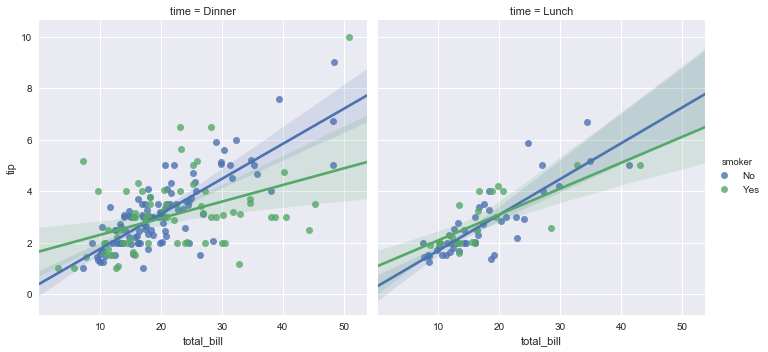

In [17]:
# 案例3：对上面数据进行进一步刻画：通过col将午餐和晚餐分开，通过是否为smoker来查看总费用与小费之间的关系
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

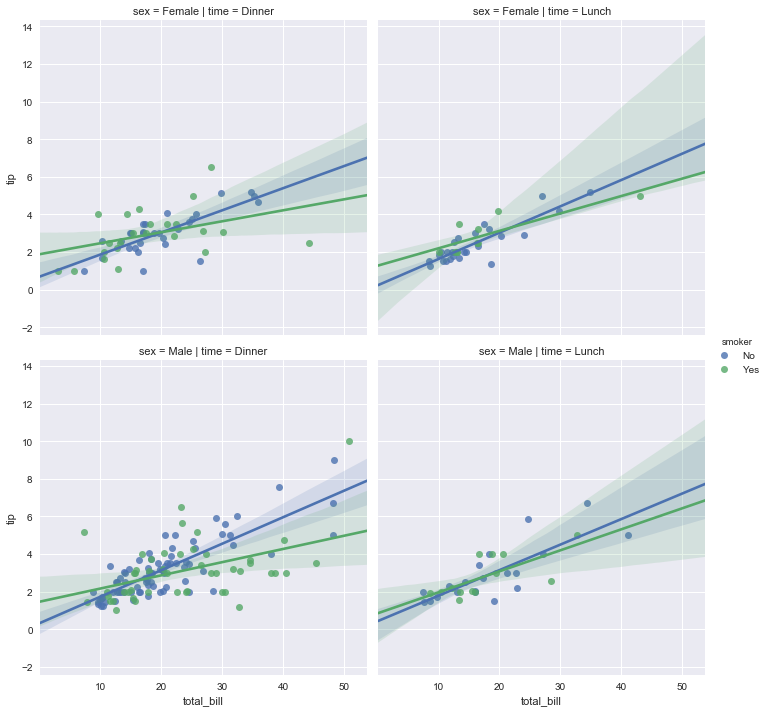

In [18]:
# 案例4：对上面数据进行进一步刻画：通过col将午餐和晚餐分开，通过row将男女篮性别分开，通过是否为smoker来查看总费用与小费之间的关系
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips)

#### 控制图片的大小和形状

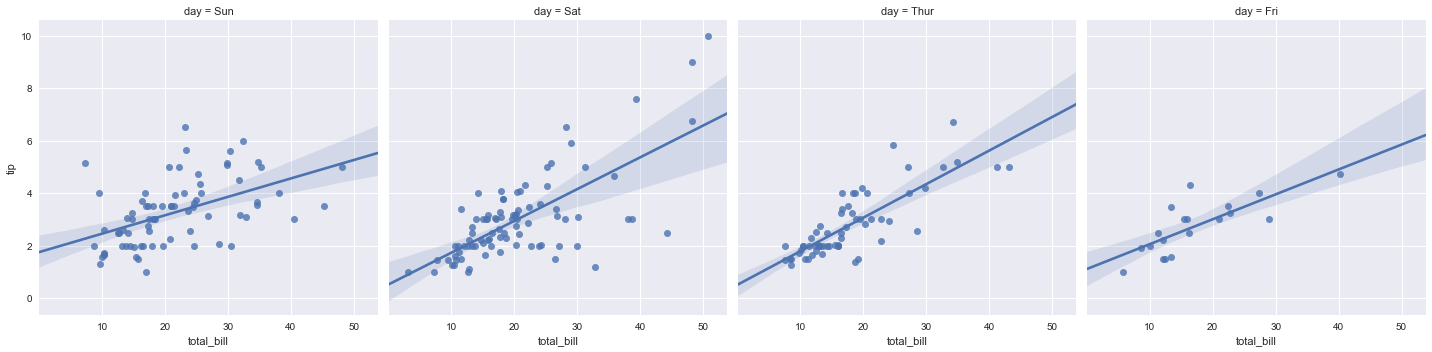

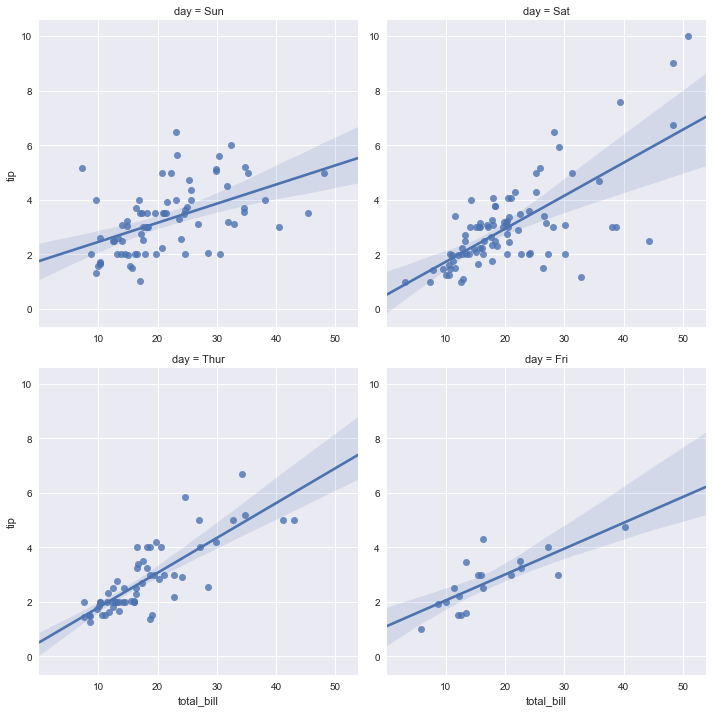

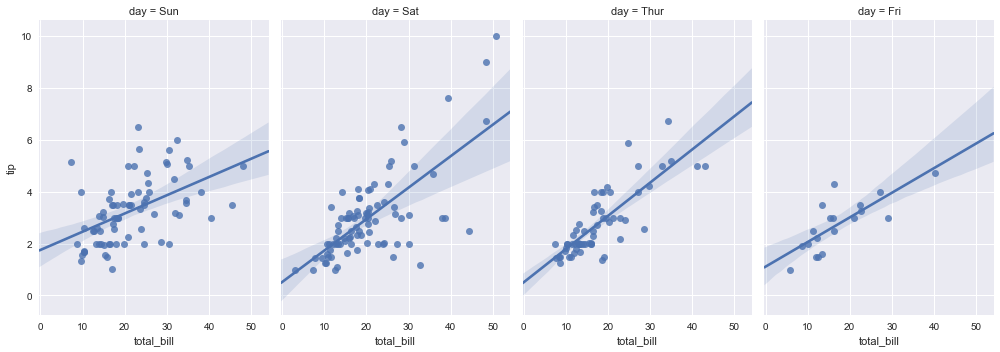

In [26]:
# 通过星期几来查看tips和total_bill的关系
sns.lmplot(x="total_bill", y="tip", col="day", data=tips)

# 每行放置2列，图片大小为5（不指定col_wrap则全部放在一行上）
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=2, size=5)

# aspect指定图片宽度的缩放比例
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=0.7)

### seaborn高级分析-离散变量分析
- 观测点的直接展示：swarmplot（蜂群图）, stripplot
- 观测近似分布的展示：boxplot, violinplot
- 均值和置信区间的展示：barplot, pointplot

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

np.random.seed(2017)

titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

#### 分类统计估计图

##### 统计柱状图
- 默认有均值和置信区间

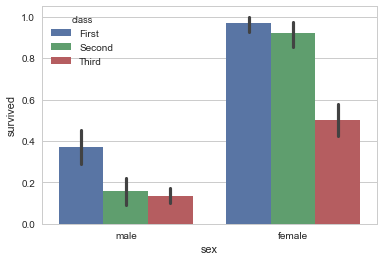

In [47]:
# 根据船舱等级class进行分组，查看sex与survived的关系（展示的是归一化后每个类别survived:all的占比）
# 分析之后发现，female存活概率更高，First存活概率更高
titanic.head()
# 下面也可以设置为：ci=None或者设置为ci=95
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

##### 灰色柱状图

对应pandas中的value_counts

- 适用场景：
    - 衣服颜色的分布
    - 不同尺码的分布
    - 不同城市数量的分布

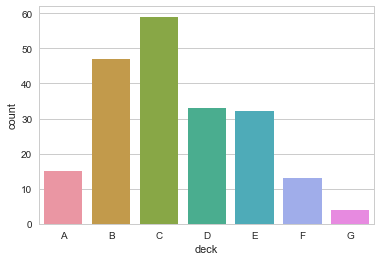

In [48]:
sns.countplot(x="deck", data=titanic)

##### 点图
- 表示hue变量的均值`(·表示)`和置信区间`(|表示)`，并且将不同x和y值下对应相同的hue用线将点连接起来

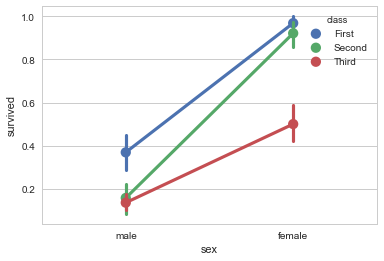

In [49]:
sns.pointplot(x="sex", y="survived", hue="class", datba=titanic)

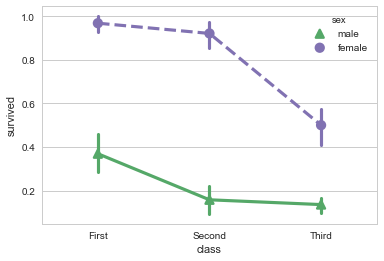

In [50]:
# 修改颜色、标记、线型
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

#### 分类散点图（分布图）
- 分类都是离散的x，不能用连续的x

##### 条形散点图

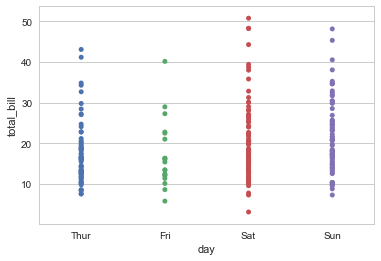

In [4]:
# 根据weekday呈现该日的total_bill数量分布情况
sns.stripplot(x="day", y="total_bill", data=tips)

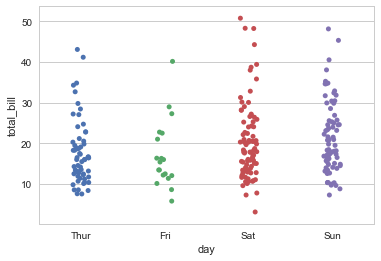

In [5]:
# 太密集可以用jitter（但是每一次的jitter都是随机的）
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

##### 蜂群图
- 为了避免重叠，可以使用蜂群图
- 当数据为同一个y或者y值相近的时候，

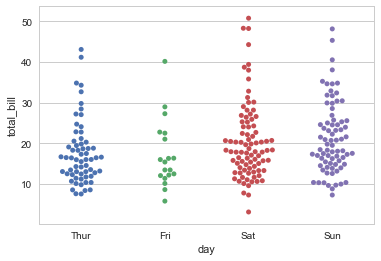

In [6]:
sns.swarmplot(x="day", y="total_bill", data=tips)

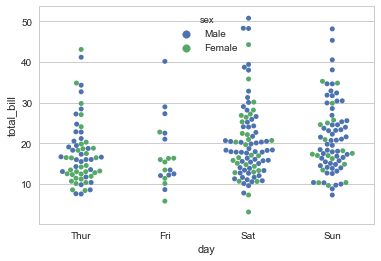

In [7]:
# 每个一级分类内部可能存在二级分类，用hue分类（看每个蜂群中，男女占比是多少）
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

#### 分类分布图

##### 箱线图
上边缘、上四分位数、中位数、下四分位数、下边缘

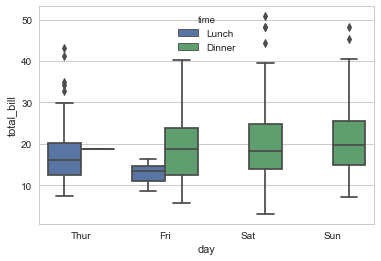

In [8]:
# 因为Thur的Dinner只有一个样本，因此只有一条线（最值、分位数是一个数）
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

##### 提琴图
箱线图 + KDE(Kernel Distribution Estimation)
- 中间的白点是中位数
- 粗黑线两端为上下四分位数
- 细黑线两段为上下边界
- 外边包裹KDE曲线（包含异常值点的分布）

##### 对称式提琴图

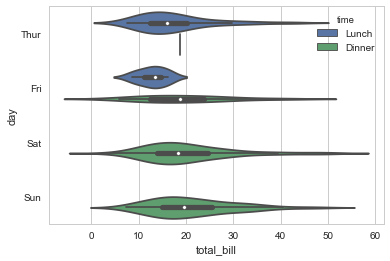

In [13]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

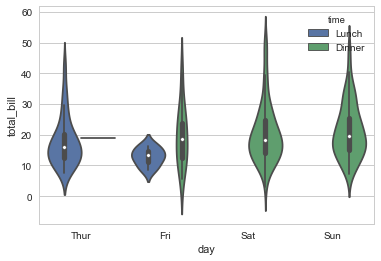

In [14]:
sns.violinplot(x="day", y="total_bill", hue="time", data=tips)

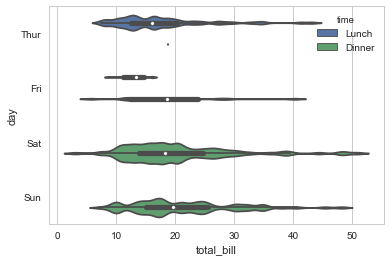

In [16]:
# 可以调节KDE的拟合gaussion函数的宽度（当前是0.1，刻画较为细致，有很多不平滑的点）
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)

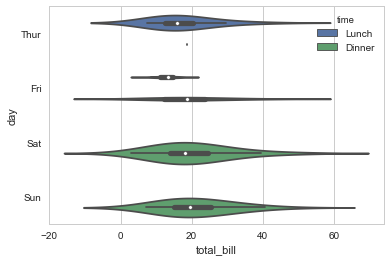

In [26]:
# bw=1，刻画效果刚刚好
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=1, scale="count", scale_hue=False)

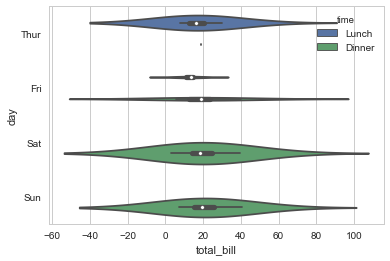

In [19]:
# bw=3，曲线偏胖，整体隆起
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=3, scale="count", scale_hue=False)

##### 非对称提琴图
- 设置`split=True`，将两个分组合并在一张图上
- 关于`"inner"`设置
    - `inner="stick"`，在内部刻画上样本密度的条纹
    - `inner="box"`，内部有样本的中位数和箱线图，但是不知道是谁的@
    - `inner="quartile"`，内部有各自分类的四分位数
    - `inner="point"`，在内部刻画上样本密度的轴点
    - `inner=None`，内部无内容
- 注意：此处'hue'对象是二值变量，多了不可以画对称图形

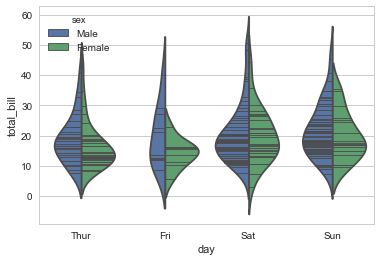

In [38]:
# 从下面可以看出周四~周日，男女消费哪一方更多
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="stick")
# help(sns.violinplot)

#### 分类子图
##### 画指定类型图

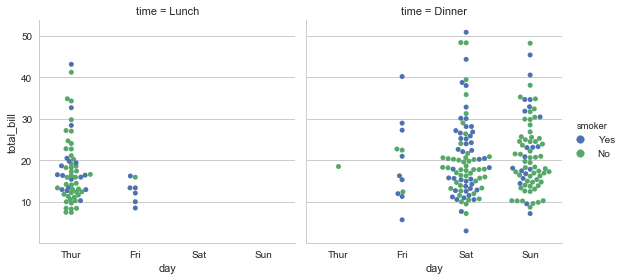

In [51]:
sns.factorplot(x="day", y="total_bill", hue="smoker", col="time", data=tips, kind="swarm")

##### 画指定横纵项的子图
- 先用`sns.PairGrid()`指定网格的x和y项名称，宽度缩放比例和图片大小
- 再用`map()`函数映射进想要绘制的图形和调色板样式

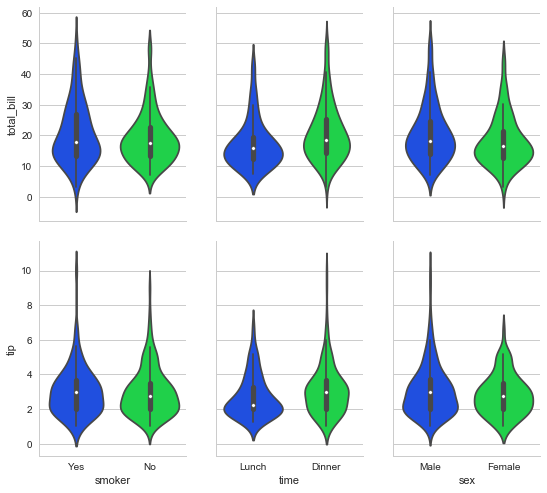

In [56]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)

g.map(sns.violinplot, palette="bright");

## Seaborn速查表
![](./img/seaborn-cheatsheet.png)

- 当求出来列与列的相关系数时，可以通过`sns.heatmap()`看列与列的相关度